In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

e:\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:


# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()



dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [5]:
# cek dataset tidak terdapat imbalance data (data yang tidak balance)
mnist = datasets.fetch_openml('mnist_784', parser='auto')


X, y = mnist.data, mnist.target.astype(int)
label_counts = np.bincount(y)
print("Jumlah data per label:")
for i in range(10):
    print(f"Label {i}: {label_counts[i]}")

Jumlah data per label:
Label 0: 6903
Label 1: 7877
Label 2: 6990
Label 3: 7141
Label 4: 6824
Label 5: 6313
Label 6: 6876
Label 7: 7293
Label 8: 6825
Label 9: 6958


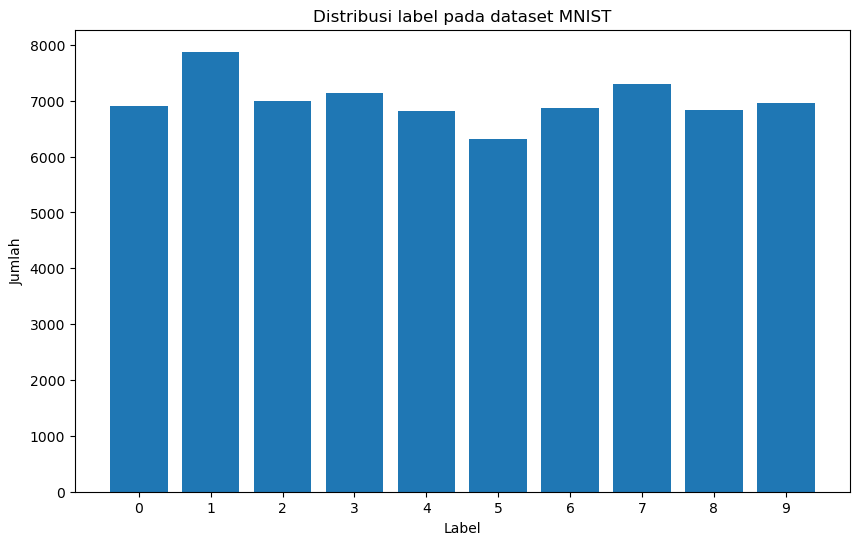

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Ekstrak label dari dataset
labels = mnist.target

# Hitung jumlah setiap label
unique, counts = np.unique(labels, return_counts=True)

# Plot distribusi label
plt.figure(figsize=(10,6))
plt.bar(unique, counts, tick_label=unique)
plt.title("Distribusi label pada dataset MNIST")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()


Dari grafik yang di tampilkan dapat dilihat bahwa persebaran data di kisaran 6000 - 7000 sehingga dapat dikatakan seimbang karena selisihnya tidak terlalu jauh

### 2.Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

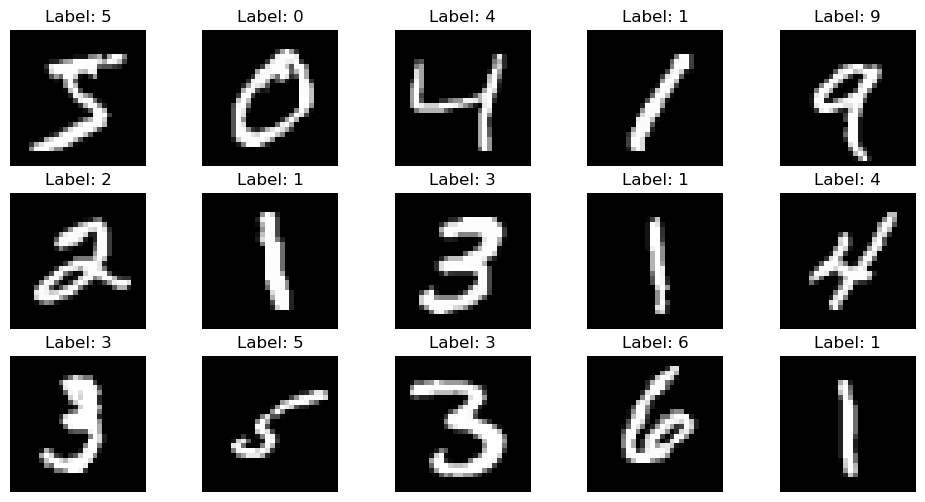

In [7]:
# Ubah DataFrame ke array numpy
X_np = X.to_numpy()

# Tampilkan 15 citra pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_np[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

### 3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [8]:
# Melakukan scaling terlebih dahulu sebelum PCA, agar setiap fitur memiliki mean=0 dan variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

# Menggunakan PCA
pca = PCA(n_components=0.95) # kita ingin mempertahankan 95% variasi dari data
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of features: {X_np.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")


Original number of features: 784
Reduced number of features: 332


### 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [15]:


# Mengimpor modul train_test_split dari scikit-learn untuk pembagian dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Mengimpor MinMaxScaler dari scikit-learn untuk normalisasi fitur
from sklearn.preprocessing import MinMaxScaler

# Mengimpor fungsi-fungsi yang digunakan untuk mengukur performa model, seperti akurasi, laporan klasifikasi, dan matriks kebingungan
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mengimpor modul SVM (Support Vector Machine) dari scikit-learn untuk digunakan dalam klasifikasi
from sklearn.svm import SVC



In [16]:


# Scaling data
# Membuat objek MinMaxScaler yang akan digunakan untuk penskalaan fitur
scaler = MinMaxScaler()

# Melakukan penskalaan data dengan metode Min-Max
X_scaled = scaler.fit_transform(X)



In [17]:
# Split data dengan rasio 70:30
# Menggunakan train_test_split untuk membagi data menjadi data latih dan data uji
# test_size=0.3 menentukan bahwa 30% dari data akan menjadi data uji
# random_state=42 untuk mengatur generator angka acak agar hasilnya dapat direproduksi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Menampilkan informasi mengenai pembagian data
print("Berikut Hasil Rasio 70:30")
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Berikut Hasil Rasio 70:30
Jumlah data training: 49000
Jumlah data testing: 21000
Berikut Hasil Rasio 80:20
Jumlah data training: 56000
Jumlah data testing: 14000
Berikut Hasil Rasio 90:10
Jumlah data training: 63000
Jumlah data testing: 7000


In [19]:
# split data dengan rasio 80 : 20
# Menggunakan train_test_split untuk membagi data menjadi data latih dan data uji
# test_size=0.2 menentukan bahwa 20% dari data akan menjadi data uji
# random_state=42 untuk mengatur generator angka acak agar hasilnya dapat direproduksi
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan informasi mengenai pembagian data
print("Berikut Hasil Rasio 80:20")
print("Jumlah data training:", len(X_train_80))
print("Jumlah data testing:", len(X_test_80))

Berikut Hasil Rasio 80:20
Jumlah data training: 56000
Jumlah data testing: 14000


In [20]:
# split data dengan rasio 90 : 10
# Menggunakan train_test_split untuk membagi data menjadi data latih dan data uji
# test_size=0.1 menentukan bahwa 10% dari data akan menjadi data uji
# random_state=42 digunakan untuk mengatur generator angka acak agar hasilnya dapat direproduksi
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Menampilkan informasi mengenai pembagian data
print("Berikut Hasil Rasio 90:10")
print("Jumlah data training:", len(X_train_90))
print("Jumlah data testing:", len(X_test_90))

Berikut Hasil Rasio 90:10
Jumlah data training: 63000
Jumlah data testing: 7000


### No. 5-6 (Rasio 70:30)

- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [21]:
from sklearn.decomposition import PCA

# Proses data latih dengan PCA
# Membuat objek PCA dengan 2 komponen (angka dapat diubah sesuai kebutuhan)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)  # Melakukan reduksi dimensi pada data latih

# Proses data uji dengan PCA
X_test_pca = pca.transform(X_test)  # Melakukan reduksi dimensi pada data uji

# Latih model Naive Bayes
# Impor modul Gaussian Naive Bayes dari scikit-learn
from sklearn.naive_bayes import GaussianNB

# Membuat model Gaussian Naive Bayes
naive_bayes_model = GaussianNB()

# Melatih model Naive Bayes dengan data latih yang telah diproses PCA
naive_bayes_model.fit(X_train_pca, y_train)

# Lakukan prediksi menggunakan model Gaussian Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_pca)

# Hitung akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)  # Mengukur akurasi model Naive Bayes

# Laporan metrik klasifikasi
classification_report_nb = classification_report(y_test, y_pred_nb)  # Menghasilkan laporan metrik klasifikasi

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model Naive Bayes
print(f'Accuracy (Naive Bayes): {accuracy_nb}')
print('Classification Report (Naive Bayes):\n', classification_report_nb)

Accuracy (Naive Bayes): 0.4430952380952381
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      2058
           1       0.79      0.95      0.87      2364
           2       0.16      0.00      0.00      2133
           3       0.42      0.62      0.51      2176
           4       0.34      0.51      0.41      1936
           5       0.18      0.00      0.01      1915
           6       0.33      0.40      0.36      2088
           7       0.38      0.63      0.48      2248
           8       0.25      0.41      0.31      1992
           9       0.26      0.00      0.01      2090

    accuracy                           0.44     21000
   macro avg       0.38      0.43      0.36     21000
weighted avg       0.38      0.44      0.37     21000



In [22]:
# Mengimpor modul SVM dan modul metrik dari scikit-learn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Melatih model SVM dengan data latih yang telah diproses PCA
svm_model.fit(X_train_pca, y_train)

# Lakukan prediksi menggunakan model SVM pada data uji yang telah diproses PCA
y_pred_svm = svm_model.predict(X_test_pca)

# Hitung akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Mengukur akurasi model SVM

# Laporan metrik klasifikasi
classification_report_svm = classification_report(y_test, y_pred_svm)  # Menghasilkan laporan metrik klasifikasi

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model SVM
print(f'Accuracy: {accuracy_svm}')
print('Classification Report (SVM):\n', classification_report_svm)

Accuracy: 0.4521428571428571
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.65      0.78      0.71      2058
           1       0.81      0.96      0.88      2364
           2       0.24      0.09      0.13      2133
           3       0.46      0.61      0.52      2176
           4       0.36      0.40      0.38      1936
           5       0.18      0.04      0.06      1915
           6       0.33      0.44      0.38      2088
           7       0.40      0.68      0.51      2248
           8       0.28      0.33      0.30      1992
           9       0.31      0.07      0.12      2090

    accuracy                           0.45     21000
   macro avg       0.40      0.44      0.40     21000
weighted avg       0.41      0.45      0.41     21000



In [23]:
# Mengimpor modul metrik dari scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model terhadap data training
y_train_pred = naive_bayes_model.predict(X_train_pca)  # Melakukan prediksi pada data latih
accuracy_train = accuracy_score(y_train, y_train_pred)  # Mengukur akurasi prediksi pada data latih
report_train = classification_report(y_train, y_train_pred)  # Menghasilkan laporan metrik klasifikasi pada data latih
confusion_train = confusion_matrix(y_train, y_train_pred)  # Menghasilkan matriks kebingungan pada data latih

# Evaluasi model terhadap data testing
y_test_pred = naive_bayes_model.predict(X_test_pca)  # Melakukan prediksi pada data uji
accuracy_test = accuracy_score(y_test, y_test_pred)  # Mengukur akurasi prediksi pada data uji
report_test = classification_report(y_test, y_test_pred)  # Menghasilkan laporan metrik klasifikasi pada data uji
confusion_test = confusion_matrix(y_test, y_test_pred)  # Menghasilkan matriks kebingungan pada data uji

# Tampilkan hasil evaluasi
print("Evaluasi Model terhadap Data Training:")
print(f'Accuracy (Training): {accuracy_train}')  
print('Classification Report (Training):\n', report_train)  
print('Confusion Matrix (Training):\n', confusion_train)  

print("\nEvaluasi Model terhadap Data Testing:")
print(f'Accuracy (Testing): {accuracy_test}')  
print('Classification Report (Testing):\n', report_test)  
print('Confusion Matrix (Testing):\n', confusion_test)  

Evaluasi Model terhadap Data Training:
Accuracy (Training): 0.4399387755102041
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      4845
           1       0.80      0.95      0.87      5513
           2       0.08      0.00      0.00      4857
           3       0.42      0.63      0.50      4965
           4       0.36      0.50      0.42      4888
           5       0.24      0.01      0.01      4398
           6       0.32      0.38      0.35      4788
           7       0.36      0.62      0.46      5045
           8       0.25      0.39      0.31      4833
           9       0.27      0.00      0.01      4868

    accuracy                           0.44     49000
   macro avg       0.37      0.43      0.36     49000
weighted avg       0.38      0.44      0.37     49000

Confusion Matrix (Training):
 [[3823    1    7  160   32   17  635    5  164    1]
 [   0 5243    0   80    0    0    5   16  1

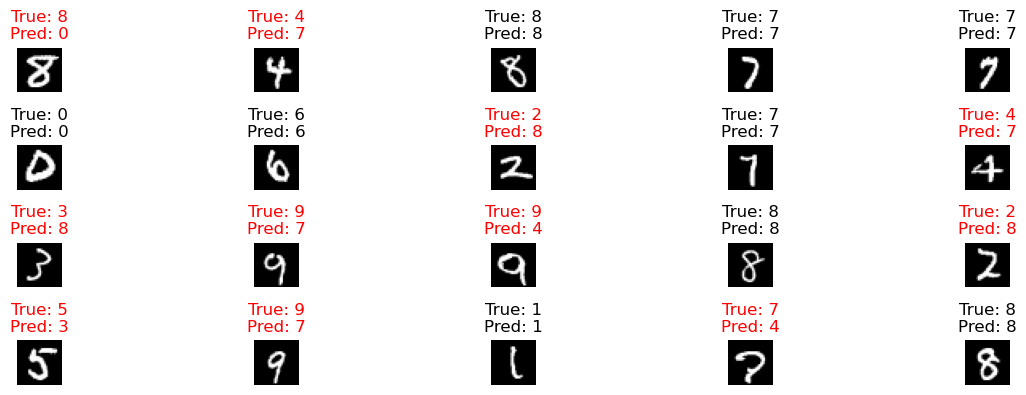

In [24]:
n_samples_to_display = 20  # Jumlah sampel yang akan ditampilkan

# Menampilkan gambar label asli dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)  # Membuat subplot dalam grid 6x5
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")  # Menampilkan citra dari data uji

    # Menentukan warna teks berdasarkan true atau prediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]  # Label asli
    pred_label = y_pred_nb[i]  # Label prediksi dari model Naive Bayes

    if true_label == pred_label:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)  # Menampilkan label asli dan prediksi dengan warna yang sesuai
    plt.axis("off")  # Menyembunyikan sumbu

plt.tight_layout()
plt.show()



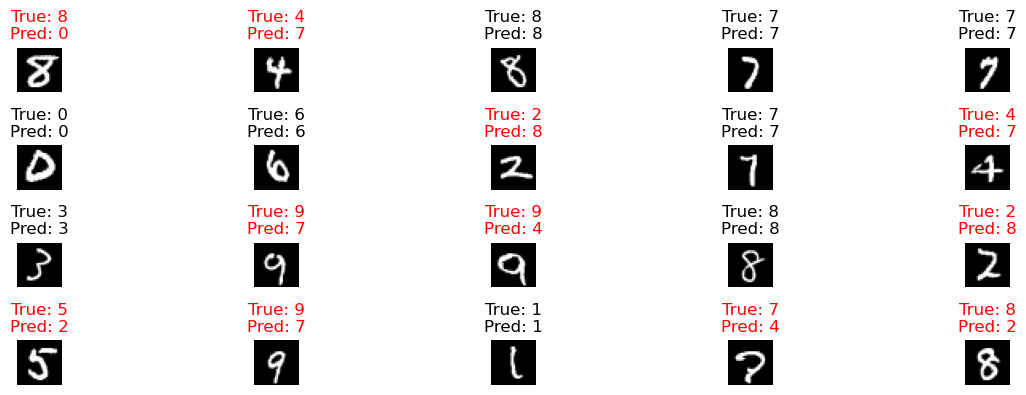

In [25]:
n_samples_to_display = 20  # Jumlah sampel yang akan ditampilkan

# Menampilkan gambar label asli dan label prediksi untuk model SVM
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)  # Membuat subplot dalam grid 6x5
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")  # Menampilkan citra dari data uji

    # Menentukan warna teks berdasarkan true atau prediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]  # Label asli
    pred_label = y_pred_svm[i]  # Label prediksi dari model SVM

    if true_label == pred_label:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)  # Menampilkan label asli dan prediksi dengan warna yang sesuai
    plt.axis("off")  # Menyembunyikan sumbu

plt.tight_layout()
plt.show()

### NO 5-6 (Rasio 80:20)

In [26]:
n_components = 10  # Jumlah komponen PCA yang akan digunakan

# Inisialisasi PCA dengan jumlah komponen yang ditentukan
pca = PCA(n_components=n_components)

# Melakukan PCA pada data training
X_train_80_pca = pca.fit_transform(X_train_80)  # Mengubah data training dengan PCA

# Melakukan PCA pada data testing
X_test_80_pca = pca.transform(X_test_80)  # Mengubah data testing dengan PCA

# Inisialisasi model Gaussian Naive Bayes
naive_bayes_model = GaussianNB()

# Melatih model Gaussian Naive Bayes dengan data latih yang telah diproses PCA
naive_bayes_model.fit(X_train_80_pca, y_train_80)  # Melatih model Naive Bayes

# Lakukan prediksi menggunakan model Gaussian Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_80_pca)  # Melakukan prediksi

# Hitung akurasi
accuracy_nb = accuracy_score(y_test_80, y_pred_nb)  # Mengukur akurasi prediksi

# Laporan metrik klasifikasi
classification_report_nb = classification_report(y_test_80, y_pred_nb)  # Menghasilkan laporan metrik klasifikasi

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model Naive Bayes
print(f'Accuracy (Naive Bayes): {accuracy_nb}')  # Mencetak akurasi
print('Classification Report (Naive Bayes):\n', classification_report_nb)  # Mencetak laporan metrik klasifikasi

Accuracy (Naive Bayes): 0.7749285714285714
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1343
           1       0.85      0.94      0.90      1600
           2       0.83      0.77      0.79      1380
           3       0.73      0.73      0.73      1433
           4       0.68      0.75      0.72      1295
           5       0.63      0.69      0.66      1273
           6       0.84      0.84      0.84      1396
           7       0.87      0.83      0.85      1503
           8       0.75      0.73      0.74      1357
           9       0.65      0.62      0.63      1420

    accuracy                           0.77     14000
   macro avg       0.77      0.77      0.77     14000
weighted avg       0.78      0.77      0.78     14000



In [27]:
# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Melatih model SVM dengan data latih yang telah diproses PCA
svm_model.fit(X_train_80_pca, y_train_80)  

# Lakukan prediksi menggunakan model SVM pada data uji yang telah diproses PCA
y_pred_svm = svm_model.predict(X_test_80_pca) 

# Lakukan penghitungan akurasi
accuracy_svm = accuracy_score(y_test_80, y_pred_svm)  

# Membuat laporan metrik klasifikasi
classification_report_svm = classification_report(y_test_80, y_pred_svm)  

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model SVM
print(f'Accuracy (SVM): {accuracy_svm}')  # Mencetak akurasi
print('Classification Report (SVM):\n', classification_report_svm)  # Mencetak laporan metrik klasifikasi

Accuracy (SVM): 0.8375714285714285
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1343
           1       0.92      0.97      0.94      1600
           2       0.84      0.84      0.84      1380
           3       0.79      0.80      0.80      1433
           4       0.75      0.81      0.78      1295
           5       0.78      0.77      0.78      1273
           6       0.89      0.89      0.89      1396
           7       0.90      0.88      0.89      1503
           8       0.84      0.78      0.81      1357
           9       0.73      0.69      0.71      1420

    accuracy                           0.84     14000
   macro avg       0.83      0.84      0.83     14000
weighted avg       0.84      0.84      0.84     14000



In [28]:
# Evaluasi model terhadap data training

# Melakukan prediksi terhadap data training yang telah diproses PCA
y_train_pred = naive_bayes_model.predict(X_train_80_pca)  
# Menghitung akurasi prediksi terhadap data training
accuracy_train = accuracy_score(y_train_80, y_train_pred)  
 # Membuat laporan metrik klasifikasi terhadap data training
report_train = classification_report(y_train_80, y_train_pred) 
# Menghasilkan matriks kebingungan (confusion matrix) terhadap data training
confusion_train = confusion_matrix(y_train_80, y_train_pred)  

# Evaluasi model terhadap data testing

# Melakukan prediksi terhadap data testing yang telah diproses PCA
y_test_pred = naive_bayes_model.predict(X_test_80_pca)  
# Menghitung akurasi prediksi terhadap data testing
accuracy_test = accuracy_score(y_test_80, y_test_pred)  
# Membuat laporan metrik klasifikasi terhadap data testing
report_test = classification_report(y_test_80, y_test_pred)  
# Menghasilkan matriks kebingungan (confusion matrix) terhadap data testing
confusion_test = confusion_matrix(y_test_80, y_test_pred)  

# Tampilkan hasil evaluasi
print("Evaluasi Model terhadap Data Training:")
print(f'Accuracy (Training): {accuracy_train}')  # Mencetak akurasi terhadap data training
print('Classification Report (Training):\n', report_train)  # Mencetak laporan metrik klasifikasi terhadap data training
print('Confusion Matrix (Training):\n', confusion_train)  # Mencetak matriks kebingungan (confusion matrix) terhadap data training

print("\nEvaluasi Model terhadap Data Testing:")
print(f'Accuracy (Testing): {accuracy_test}')  # Mencetak akurasi terhadap data testing
print('Classification Report (Testing):\n', report_test)  # Mencetak laporan metrik klasifikasi terhadap data testing
print('Confusion Matrix (Testing):\n', confusion_test)  # Mencetak matriks kebingungan (confusion matrix) terhadap data testing

Evaluasi Model terhadap Data Training:
Accuracy (Training): 0.7702321428571428
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      5560
           1       0.85      0.94      0.89      6277
           2       0.82      0.77      0.79      5610
           3       0.72      0.73      0.72      5708
           4       0.70      0.73      0.72      5529
           5       0.61      0.67      0.64      5040
           6       0.86      0.84      0.85      5480
           7       0.87      0.82      0.84      5790
           8       0.74      0.73      0.73      5468
           9       0.63      0.63      0.63      5538

    accuracy                           0.77     56000
   macro avg       0.77      0.77      0.77     56000
weighted avg       0.77      0.77      0.77     56000

Confusion Matrix (Training):
 [[4575    0   33  113    9  609  194    7   13    7]
 [   0 5877  176   23    3   80   35   14   

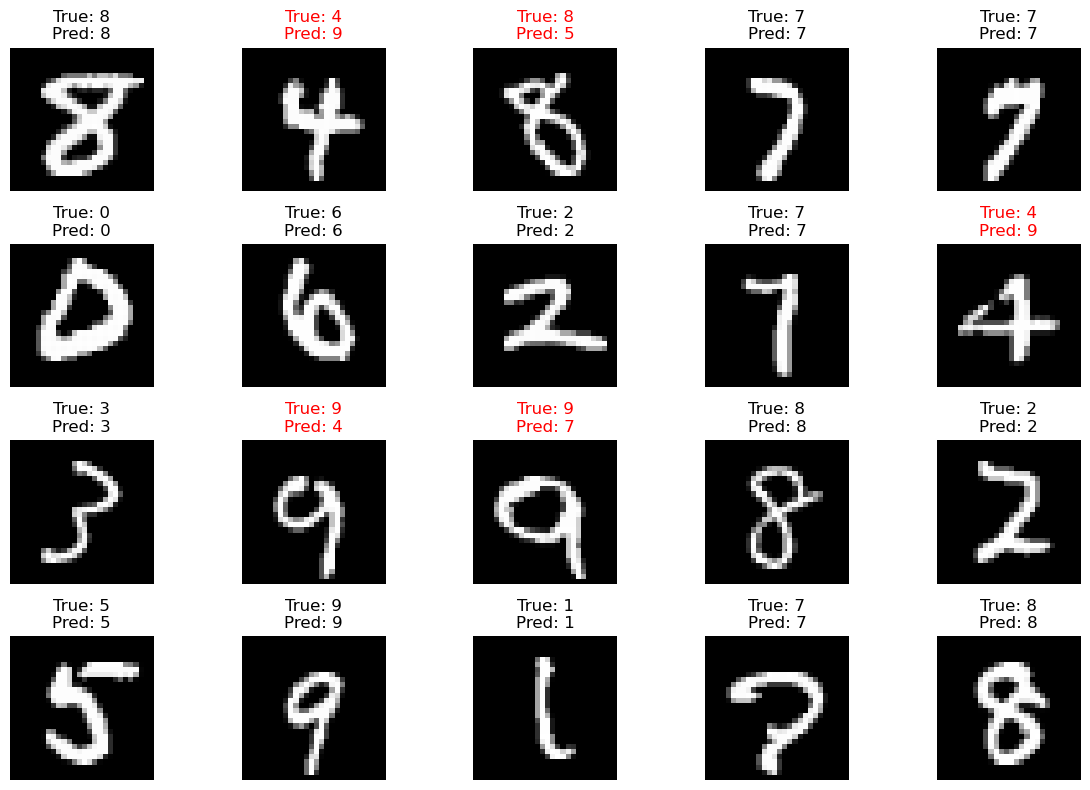

In [29]:
n_samples_to_display = 20  # Jumlah sampel yang akan ditampilkan

# Prediksi label dengan model Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_80_pca)  # Melakukan prediksi label pada data uji yang telah diproses PCA menggunakan model Gaussian Naive Bayes

# Menampilkan gambar dengan label asli dan label prediksi
plt.figure(figsize=(12, 8))  # Membuat sebuah figur dengan ukuran tertentu
for i in range(n_samples_to_display):
    plt.subplot(4, 5, i + 1)  # Membuat sub-plot dalam figur dengan 4 baris dan 5 kolom, dengan nomor sub-plot berdasarkan iterasi

    # Menampilkan gambar dari data testing yang telah diproses PCA
    plt.imshow(X_test_80[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan kebenaran atau prediksi
    true_label = y_test_80.values[i]  # Mengambil label asli dari data testing
    pred_label = y_pred_nb[i]  # Mengambil label prediksi yang dihasilkan oleh model Naive Bayes

    if true_label == pred_label:
        text_color = 'black'  # Jika label asli sama dengan label prediksi, teks berwarna hitam
    else:
        text_color = 'red'  # Jika label asli berbeda dengan label prediksi, teks berwarna merah

    # Menambahkan judul dengan label asli dan label prediksi beserta warna teks
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)

    plt.axis("off")  # Menghilangkan sumbu

plt.tight_layout()  # Menyusun sub-plot agar tampil rapi
plt.show()  # Menampilkan figur

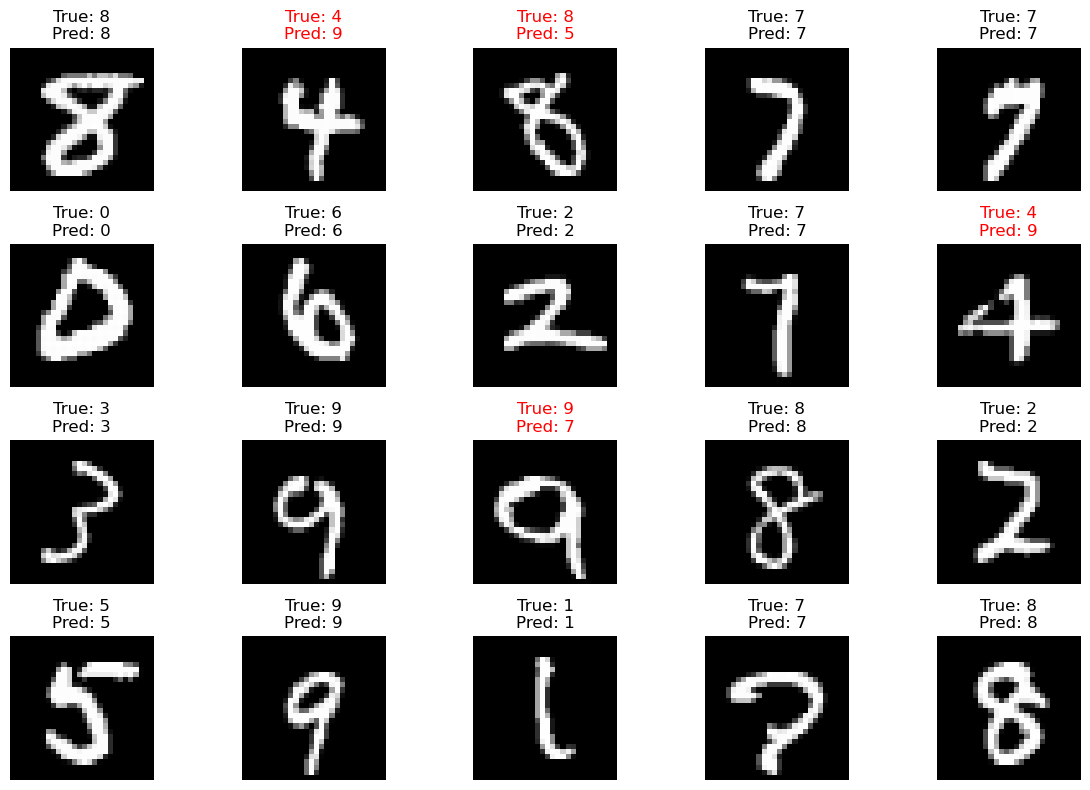

In [30]:
n_samples_to_display = 20  # Jumlah sampel yang akan ditampilkan

# Prediksi label dengan model Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_80_pca)  # Melakukan prediksi label pada data uji yang telah diproses PCA menggunakan model Naive Bayes. 
# Menampilkan gambar dengan label asli dan label prediksi
plt.figure(figsize=(12, 8))  # Membuat figur dengan ukuran tertentu
for i in range(n_samples_to_display):
    plt.subplot(4, 5, i + 1)  # Membuat sub-plot dalam figur dengan 4 baris dan 5 kolom, dengan nomor sub-plot berdasarkan iterasi

    # Menampilkan gambar dari data testing yang telah diproses PCA
    plt.imshow(X_test_80[i].reshape(28, 28), cmap="gray")  # Menampilkan gambar data testing yang telah diproses PCA dengan skala warna grayscale

    # Menentukan warna teks pada judul berdasarkan kesamaan atau perbedaan antara label asli dan label prediksi
    true_label = y_test_80.values[i]  # Mengambil label asli dari data testing
    pred_label = y_pred_svm[i]  # Mengambil label prediksi yang dihasilkan oleh model SVM (dengan kernel linear)

    if true_label == pred_label:
        text_color = 'black'  # Jika label asli sama dengan label prediksi, teks akan berwarna hitam
    else:
        text_color = 'red'  # Jika label asli berbeda dengan label prediksi, teks akan berwarna merah

    # Menambahkan judul dengan label asli dan label prediksi beserta warna teks
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")  # Menghilangkan sumbu pada sub-plot

plt.tight_layout()  # Menyusun sub-plot agar tampil rapi
plt.show()  # Menampilkan figur

### No 5-6 (Rasio 90:10)

In [31]:
n_components = 10  # Jumlah komponen PCA yang akan digunakan

# Inisialisasi objek PCA dengan jumlah komponen yang ditentukan
pca = PCA(n_components=n_components)

# Melakukan PCA pada data training
X_train_90_pca = pca.fit_transform(X_train_90)  # Mengubah data training menggunakan PCA

# Melakukan PCA pada data testing
X_test_90_pca = pca.transform(X_test_90)  # Mengubah data testing menggunakan PCA

# Inisialisasi model Gaussian Naive Bayes
naive_bayes_model = GaussianNB()

# Melatih model Gaussian Naive Bayes dengan data latih yang telah diproses PCA
naive_bayes_model.fit(X_train_90_pca, y_train_90)  # Melatih model dengan data training yang telah diproses PCA

# Lakukan prediksi menggunakan model Gaussian Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_90_pca)  # Melakukan prediksi label pada data testing yang telah diproses PCA

# Hitung akurasi
accuracy_nb = accuracy_score(y_test_90, y_pred_nb)  # Menghitung akurasi prediksi

# Laporan metrik klasifikasi
classification_report_nb = classification_report(y_test_90, y_pred_nb)  # Menghasilkan laporan metrik klasifikasi

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model Naive Bayes
print(f'Accuracy (Naive Bayes): {accuracy_nb}')  # Menampilkan akurasi model Naive Bayes pada data testing
print('Classification Report (Naive Bayes):\n', classification_report_nb)  # Menampilkan laporan metrik klasifikasi

Accuracy (Naive Bayes): 0.7691428571428571
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       683
           1       0.84      0.94      0.89       800
           2       0.83      0.75      0.79       674
           3       0.73      0.72      0.73       760
           4       0.66      0.77      0.71       611
           5       0.62      0.69      0.65       658
           6       0.83      0.82      0.82       677
           7       0.88      0.82      0.85       724
           8       0.76      0.72      0.74       693
           9       0.66      0.61      0.63       720

    accuracy                           0.77      7000
   macro avg       0.77      0.77      0.77      7000
weighted avg       0.77      0.77      0.77      7000



In [32]:
# Inisialisasi model SVM dengan kernel linear
svm_model = SVC(kernel='linear')

# Melatih model SVM dengan data latih yang telah diproses PCA
svm_model.fit(X_train_90_pca, y_train_90)  # Melatih model SVM dengan data training yang telah diproses PCA

# Lakukan prediksi menggunakan model SVM pada data uji yang telah diproses PCA
y_pred_svm = svm_model.predict(X_test_90_pca)  # Melakukan prediksi label pada data testing yang telah diproses PCA

# Hitung akurasi
accuracy_svm = accuracy_score(y_test_90, y_pred_svm)  # Menghitung akurasi prediksi

# Laporan metrik klasifikasi
classification_report_svm = classification_report(y_test_90, y_pred_svm)  # Menghasilkan laporan metrik klasifikasi

# Tampilkan hasil akurasi dan laporan metrik klasifikasi untuk model SVM
print(f'Accuracy (SVM): {accuracy_svm}')  # Menampilkan akurasi model SVM pada data testing
print('Classification Report (SVM):\n', classification_report_svm)  # Menampilkan laporan metrik klasifikasi

Accuracy (SVM): 0.837
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       683
           1       0.91      0.97      0.94       800
           2       0.83      0.83      0.83       674
           3       0.80      0.79      0.80       760
           4       0.76      0.82      0.79       611
           5       0.78      0.79      0.79       658
           6       0.89      0.88      0.88       677
           7       0.91      0.87      0.89       724
           8       0.83      0.77      0.80       693
           9       0.75      0.70      0.72       720

    accuracy                           0.84      7000
   macro avg       0.83      0.84      0.83      7000
weighted avg       0.84      0.84      0.84      7000



In [33]:
# Evaluasi model terhadap data training
y_train_pred = naive_bayes_model.predict(X_train_90_pca)  # Melakukan prediksi label pada data training yang telah diproses PCA
accuracy_train = accuracy_score(y_train_90, y_train_pred)  # Menghitung akurasi prediksi terhadap data training
report_train = classification_report(y_train_90, y_train_pred)  # Menghasilkan laporan metrik klasifikasi untuk data training
confusion_train = confusion_matrix(y_train_90, y_train_pred)  # Menghasilkan matriks kebingungan (confusion matrix) untuk data training

# Evaluasi model terhadap data testing
y_test_pred = naive_bayes_model.predict(X_test_90_pca)  # Melakukan prediksi label pada data testing yang telah diproses PCA
accuracy_test = accuracy_score(y_test_90, y_test_pred)  # Menghitung akurasi prediksi terhadap data testing
report_test = classification_report(y_test_90, y_test_pred)  # Menghasilkan laporan metrik klasifikasi untuk data testing
confusion_test = confusion_matrix(y_test_90, y_test_pred)  # Menghasilkan matriks kebingungan (confusion matrix) untuk data testing

# Tampilkan hasil evaluasi
print("Evaluasi Model terhadap Data Training:")
print(f'Accuracy (Training): {accuracy_train}')  # Menampilkan akurasi model pada data training
print('Classification Report (Training):\n', report_train)  # Menampilkan laporan metrik klasifikasi untuk data training
print('Confusion Matrix (Training):\n', confusion_train)  # Menampilkan matriks kebingungan (confusion matrix) untuk data training

print("\nEvaluasi Model terhadap Data Testing:")
print(f'Accuracy (Testing): {accuracy_test}')  # Menampilkan akurasi model pada data testing
print('Classification Report (Testing):\n', report_test)  # Menampilkan laporan metrik klasifikasi untuk data testing
print('Confusion Matrix (Testing):\n', confusion_test)  # Menampilkan matriks kebingungan (confusion matrix) untuk data testing

Evaluasi Model terhadap Data Training:
Accuracy (Training): 0.7717301587301587
Classification Report (Training):
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      6220
           1       0.85      0.94      0.89      7077
           2       0.82      0.77      0.79      6316
           3       0.72      0.73      0.72      6381
           4       0.71      0.73      0.72      6213
           5       0.61      0.67      0.64      5655
           6       0.86      0.84      0.85      6199
           7       0.87      0.82      0.85      6569
           8       0.74      0.73      0.73      6132
           9       0.63      0.63      0.63      6238

    accuracy                           0.77     63000
   macro avg       0.77      0.77      0.77     63000
weighted avg       0.77      0.77      0.77     63000

Confusion Matrix (Training):
 [[5123    0   36  129   11  670  220    8   14    9]
 [   0 6622  196   30    4   88   37   20   

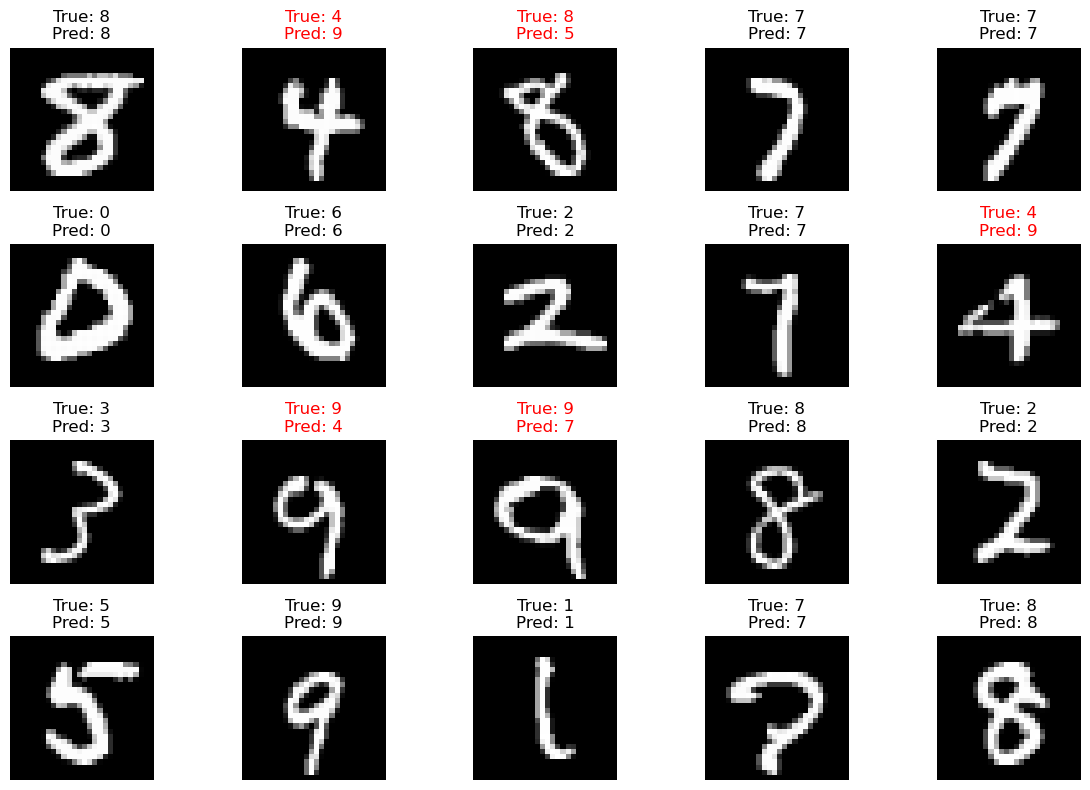

In [34]:
n_samples_to_display = 20  # Jumlah sampel yang akan ditampilkan

# Prediksi label dengan model Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_90_pca)  # Melakukan prediksi label pada data uji yang telah diproses PCA

# Menampilkan gambar dengan label asli dan label prediksi
plt.figure(figsize=(12, 8))  # Mengatur ukuran figur untuk tampilan

for i in range(n_samples_to_display):
    plt.subplot(4, 5, i + 1)  # Membuat subplot dalam bentuk grid 4x5
    plt.imshow(X_test_90[i].reshape(28, 28), cmap="gray")  # Menampilkan gambar dari data uji yang asli

    # Menentukan warna teks berdasarkan apakah prediksi benar atau salah
    true_label = y_test_90.values[i]  # Label asli
    pred_label = y_pred_nb[i]  # Label yang diprediksi

    if true_label == pred_label:
        text_color = 'black'  # Jika prediksi benar, warna teks hitam
    else:
        text_color = 'red'  # Jika prediksi salah, warna teks merah

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)  # Menampilkan label asli dan prediksi dengan warna yang sesuai
    plt.axis("off")  # Menghilangkan sumbu x dan y pada gambar

plt.tight_layout()  # Mengatur tata letak subplot
plt.show()  # Menampilkan figur dengan gambar dan label asli serta prediksi

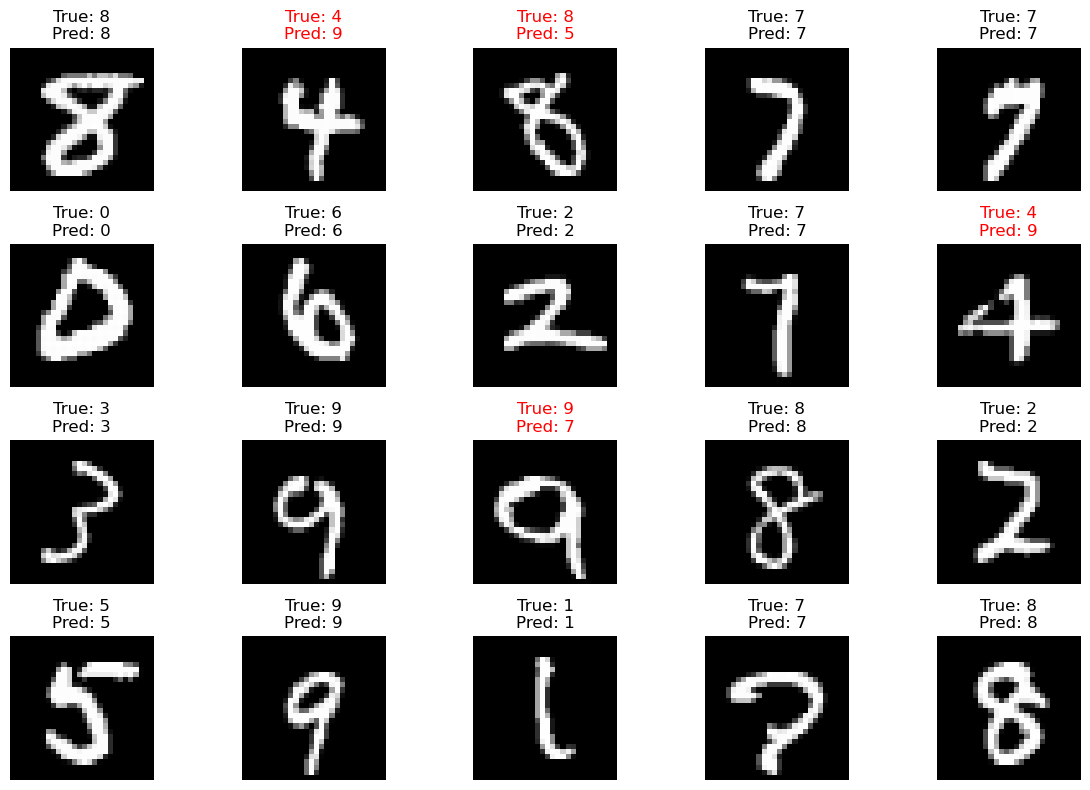

In [35]:
n_samples_to_display = 20  # Jumlah sampel yang akan ditampilkan

# Prediksi label dengan model Naive Bayes pada data uji yang telah diproses PCA
y_pred_nb = naive_bayes_model.predict(X_test_90_pca)  # Melakukan prediksi label pada data uji yang telah diproses PCA menggunakan model Naive Bayes

# Menampilkan gambar dengan label asli dan label prediksi
plt.figure(figsize=(12, 8))  # Mengatur ukuran figur untuk tampilan

for i in range(n_samples_to_display):
    plt.subplot(4, 5, i + 1)  # Membuat subplot dalam bentuk grid 4x5
    plt.imshow(X_test_90[i].reshape(28, 28), cmap="gray")  # Menampilkan gambar dari data uji yang asli

    # Menentukan warna teks berdasarkan apakah prediksi benar atau salah
    true_label = y_test_90.values[i]  # Label asli
    pred_label = y_pred_svm[i]  # Label yang diprediksi dengan model SVM

    if true_label == pred_label:
        text_color = 'black'  # Jika prediksi benar, warna teks hitam
    else:
        text_color = 'red'  # Jika prediksi salah, warna teks merah

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)  # Menampilkan label asli dan prediksi dengan warna yang sesuai
    plt.axis("off")  # Menghilangkan sumbu x dan y pada gambar

plt.tight_layout()  # Mengatur tata letak subplot
plt.show()  # Menampilkan figur dengan gambar dan label asli serta prediksi

### 7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

Dari hasil uji dalam studi kasus ini adalah model SVM menggunkana kernel linear.
dari eksperimane ini menggunakan rasio 70:30, 80:20, 90:10. 

Memiliki hasil sebagai berikut:

Pada rasio 70:30, model Naive Bayes mendapatkan akurasi sekitar 44%, sedangkan model SVM mencapai akurasi sekitar 45%. dari hasil dapat dilihat bahwa tingkat kaurasi kurang dari 50% yang menunjukkan tingkat akurasi ngata rendah mungkin hal ini disebabkan karena data train hanya 70% sehingga dara train yang di perlukan unutk belajar kurang baik dan prediksi yang di hasilkan kurang maksimal

Pada rasio 80:20, model Naive Bayes mencapai akurasi sekitar 77%, sementara model SVM mencapai akurasi sekitar 83%. ini sangat berbeda dibandingkan dengan rasio 70:30 yang naik secara drastis sehingga dapat dilihat dari banyak data trarin yang di berikan maka semakin akurat prediksi yang di hasilkan.

Pada rasio 90:10, model Naive Bayes mencapai akurasi sekitar 77%, sedangkan model SVM mencapai akurasi sekitar 83%.Meskipun hanya sebagian kecil data yang digunakan untuk pengujian (10% dari dataset), akurasi tetap tinggi karena model memiliki akses ke sebagian besar data pelatihan.

sehingga dapat disimpulkan bahwa dari semua rasio yang digunakan untuk eksperimen, tingkat akurasi SVM lebih tinggi dibandingkan dengan nodel Naive Bayes. akurasi terdinggi didapat dengan rasio 80:30 yang mencapai tingkat akurasi sekitar 83%.

